# Project : Customer Churn Prediction in Telecom Industry

![](Pictures/Churn.png)

# Jaya Raghavendra | jay.raghav333@gmail.com | 7036563656

## Description
- Telecom Churn (also called as Attrition) is one of the new sensations that happened to Indian Market. Most of the telecom customers are shifting their base network to another network provider. Now, The big companies are having a hard hit to defend this situation since a significant customer base already opted out of their network. Now, the management has to find the reason, and their further steps because getting back their customers are the most challenging task, and also companies may lose a higher amount of revenue.

---

## 01 - Problem Statement
- To provide an insight about telecom churn to telecom industries and also to prepare a predictive model to calculate customer churn.

---

## 02 - Business Understanding & Business Solutions

![](Pictures/Telecom.jpeg)

### Latest News Articles:
- Vodafone: Vodafone Idea posted consolidated loss of Rs 4,881.9 crore for the fourth quarter ended March 31, 2019 amid a brutal tariff war in India's mobile market. The loss narrowed from Rs 5,004.6 crore during the third quarter of 2018-19.
- Airtel : The consolidated net profit was down 73.5 per cent for the reported period to touch Rs 970 million against Rs 3.67 billion last year. Total revenues were also down by 8.6 per cent to Rs 200 billion for the June 2018 quarter, compared to Rs 219 billion last year.

### Business Understanding
- Telecom Companies such as Airtel, Vodafone, Idea, Reliance etc., has ruled the indian market till 2016. In 2016 Reliance Owner Mukesh Ambani introduced Jio into the indian world. That made huge impact in customers churn.
- Vodafone, Airtel and Idea combinedly lost almost 7 Billion Indisn Rupees of market.
- Customers are very important for product based companies because their revenue relies on the price paid from customers.


### Procedure to find the solution
- Explore the data and analyze carefully.
- Replace the missing values and obtain a structured dataset.
- Grab insights from the data, such as relations between different services, gender churn rate.
- Prepare a normalized/scaled data.
- Train a model with various scikit learn machine learning algorithms.
- Evaluate the performance of model based on important parameters such as f1_Score, confusion matrices.

---

## 03 - Data Overview

In [1]:
# Import libraries for Data Analysis
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'ChurnAnalysis.ipynb', 'Data', 'debug.log', 'Pictures', 'README.md']


In [3]:
# Load the saved CSV file and save it as an instance
df = pd.read_csv('Data/Churn.csv')

In [4]:
# Look at the samples of data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Drop Duplicate data
df.drop_duplicates(inplace=True)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
367,7302-ZHMHP,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.15,19.15,No
2875,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,Yes
4595,2211-RMNHO,Female,0,Yes,Yes,68,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),85.30,5560,No
6195,8111-RKSPX,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),72.20,305.55,Yes
2345,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No


In [ ]:
# Tenure, SeniorCitizen, Monthly Charges, Total Charges are numerical values from our dataset.

In [9]:
# Information of our dataframe to identify DataType, Missing Values Status
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

- TotalCharges column data is in Object Datatype instead of numerical

In [10]:
# Statistics of numerial data of our data frame
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# Insight of our data inclusing object data types
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5590-YRFJT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


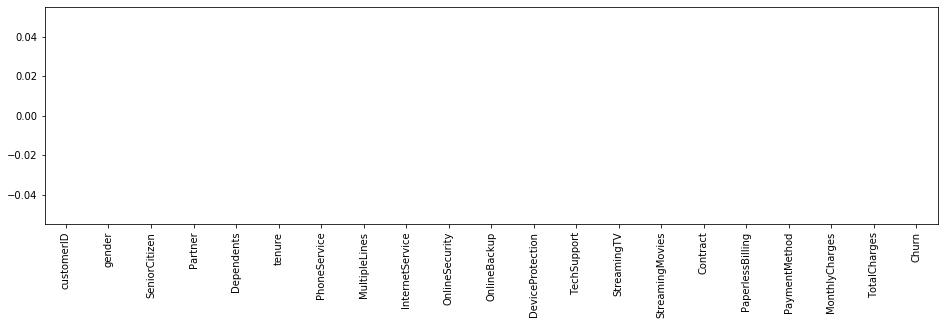

In [12]:
# Null Values
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
sns.barplot(df.isnull().sum().index, df.isnull().sum().values)

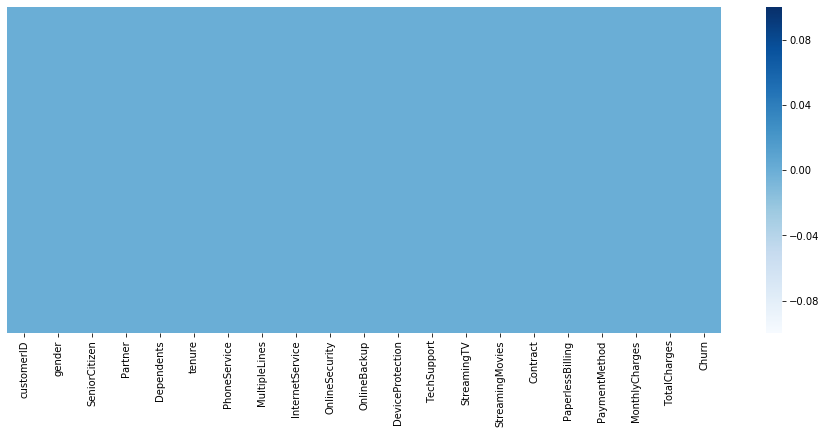

In [13]:
# Look at the null values using Seaborn plot
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cmap='Blues', yticklabels=False)

- We can see that no null values are available in our data set

## 04 - Data Cleaning

In [15]:
# Rename the columns for convinience
df.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
              'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
              'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [16]:
def object2Numerical(x):
    if x == " ":
        return np.nan
    else:
        return float(x)

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: object2Numerical(x))
df.dropna(axis=0, inplace=True)

In [17]:
# Drop Customer ID column
df.drop(labels=['CustomerID'], axis=1, inplace=True)

In [18]:
for i in df.columns:
    print('#'*50)
    print(df[i].value_counts())
    print("#"*50)

##################################################
Male      3549
Female    3483
Name: Gender, dtype: int64
##################################################
##################################################
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
##################################################
##################################################
No     3639
Yes    3393
Name: Partner, dtype: int64
##################################################
##################################################
No     4933
Yes    2099
Name: Dependents, dtype: int64
##################################################
##################################################
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: Tenure, Length: 72, dtype: int64
##################################################
##################################################
Yes    6352
No      680
Name: PhoneService, dtype: int64
###############

#### Observations
- Multiple columns have a column consists of Yes, No, No phone Service, No Internet Service in thier values.
- Both No and No phone service stands for the same, let's convert those column data to new values
- Convert TotalCharges column data into Numerical Data

In [19]:
#1 Coluns with different no values
replace_no = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies']
def replaceNo(x):
    if x == 'No internet service':
        return 'No'
    else:
        return x
for i in replace_no:
    df[i] = df[i].apply(lambda x: replaceNo(x))

def replaceNoLines(x):
    if x == 'No phone service':
        return 'No'
    else:
        return x
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: replaceNoLines(x))

In [20]:
# Create two seperate variables with Churn & Non Churn customers for clear analysis
churnedCustomers = df[df['Churn'] == 'Yes']
existingCustomers = df[df['Churn'] == 'No']

- Now we have very clean data available, Now, dig in to Data Visualization

## 05 - Data Visualization

#### Churned Customers

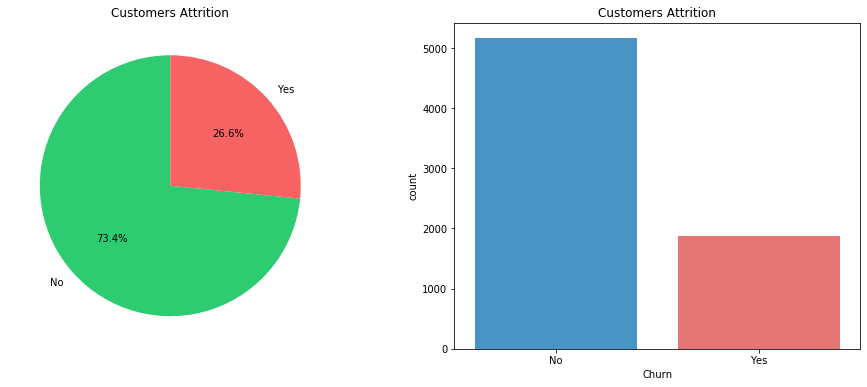

In [22]:
# Churned Customer Analysis
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Customers Attrition')
colors = ['#2ecc71', '#f76262']
plt.pie(df['Churn'].value_counts().values, labels=df['Churn'].value_counts().index,
    colors=colors, autopct='%.1f%%', startangle=90)

plt.subplot(122)
plt.title('Customers Attrition')
sns.countplot(df['Churn'])
plt.show()

#### Customers Attrition status among various atributes

In [23]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

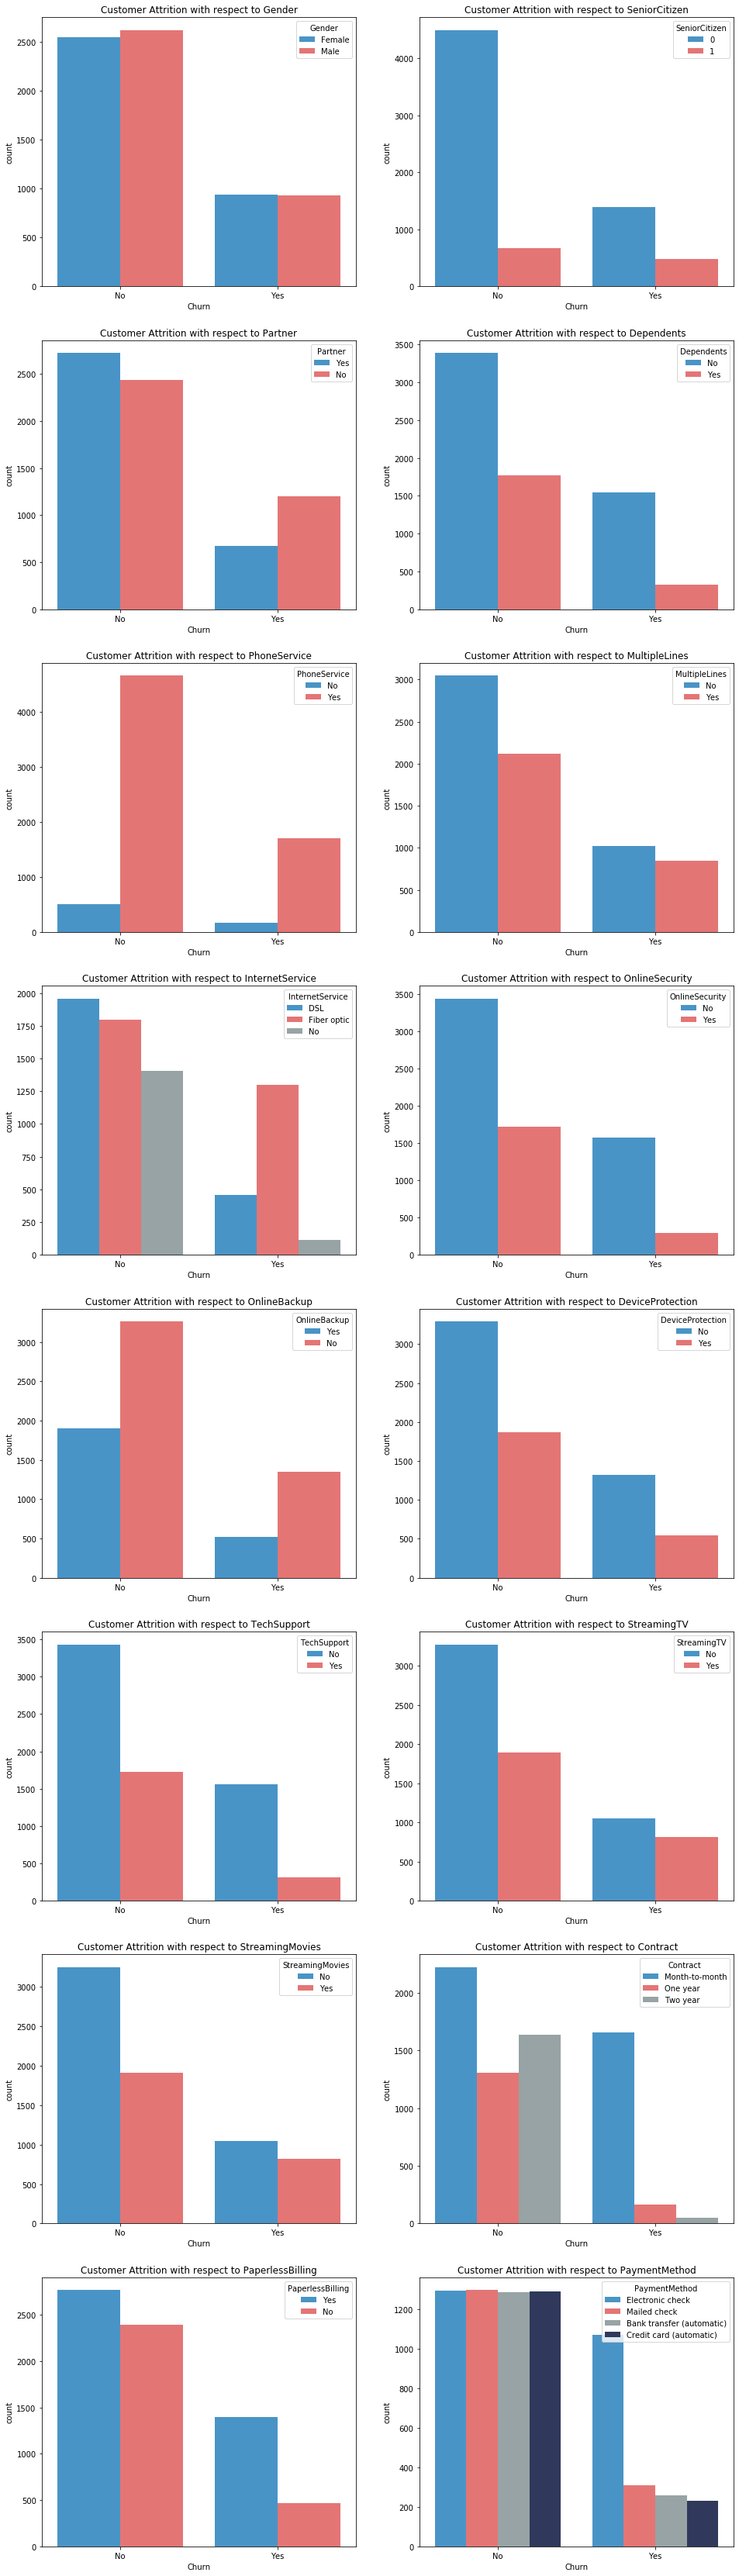

In [24]:
atts = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(16,60))

for i in range(len(atts)):
    plt.subplot(8,2,i+1)
    plt.title('Customer Attrition with respect to '+atts[i])
    sns.countplot(df['Churn'], hue=df[atts[i]])
plt.show()

#### Customer Attrition in Tenure

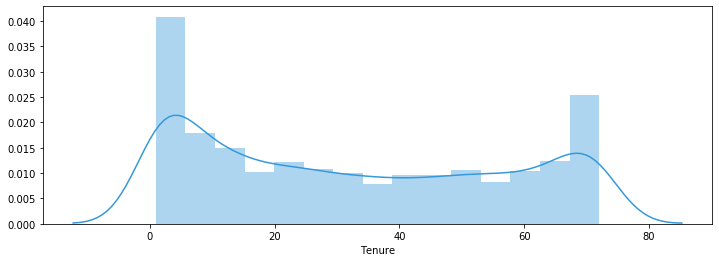

In [25]:
plt.figure(figsize=(12,4))
sns.distplot(df['Tenure'])

In [26]:
# Let's seperate tenure of our customers into 4 Categories

def TenureGroups(x):
    if 0<x<20:
        return 'Silver'
    elif 20<= x < 40:
        return 'Gold'
    elif 40<= x < 60:
        return 'Platinum'
    elif x >= 60:
        return 'Diamond'
    
df['TenureGroup'] = df['Tenure'].apply(lambda x: TenureGroups(x))

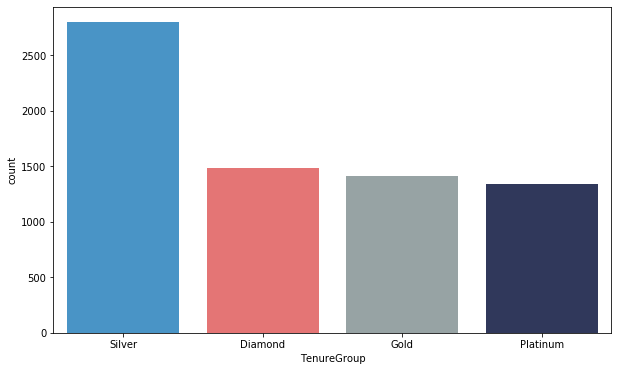

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df['TenureGroup'], order=df['TenureGroup'].value_counts().index)

#### Observation
- We can see that Major customers are Silver customers as per our seggregation.
- We have very good amount of Diamond Customers available with usas it tops in second place.
- Higher chances of attrition is possible because of huge number of people are from Silver Category

#### Let's check the Charges with our customer categories

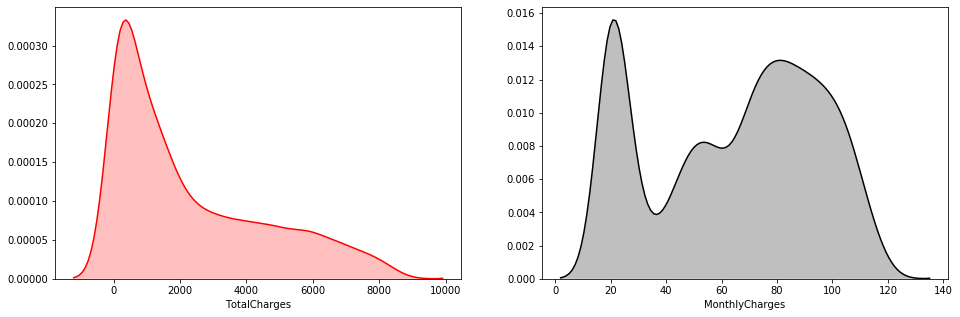

In [28]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.distplot(df['TotalCharges'], color='r', hist=False, kde_kws={"shade": True})

plt.subplot(122)
sns.distplot(df['MonthlyCharges'], color='k', hist=False, kde_kws={"shade": True})

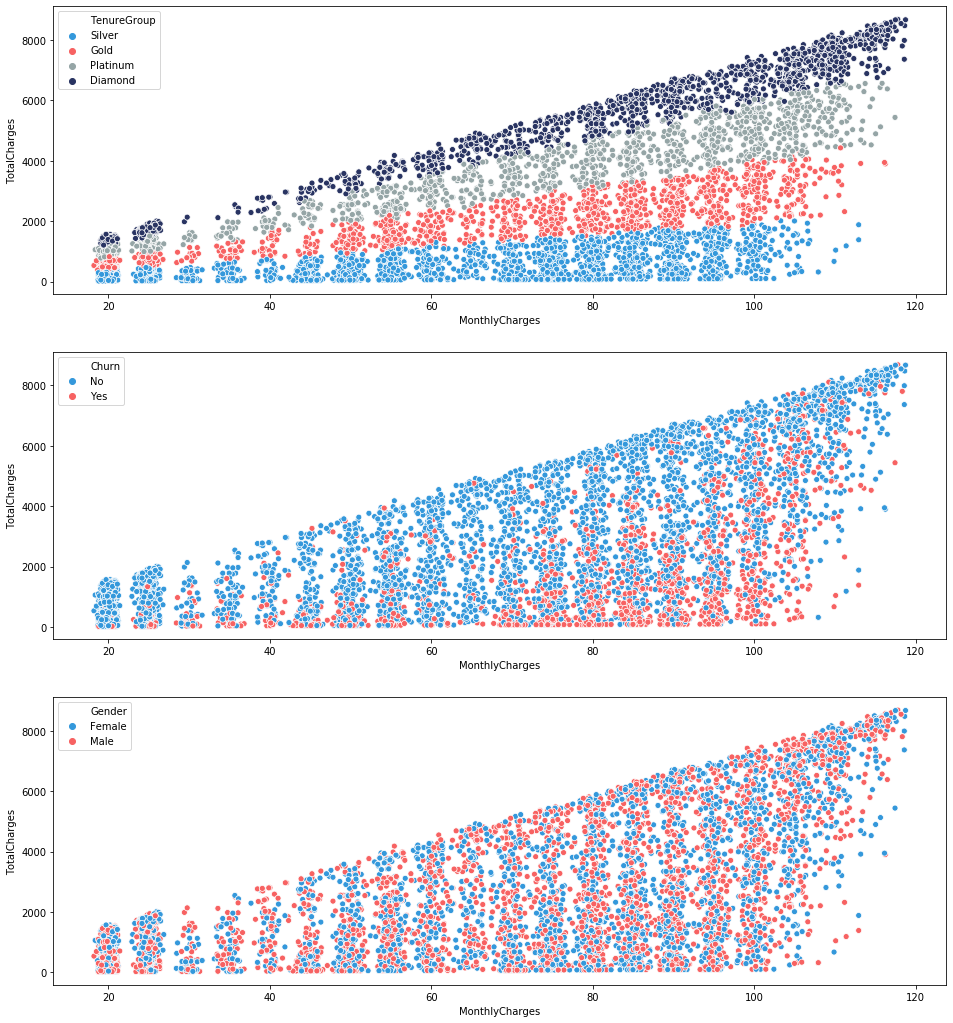

In [29]:
plt.figure(figsize=(16, 18))

plt.subplot(311)
sns.scatterplot(df['MonthlyCharges'], df['TotalCharges'], hue=df['TenureGroup'])

plt.subplot(312)
sns.scatterplot(df['MonthlyCharges'], df['TotalCharges'], hue=df['Churn'])

plt.subplot(313)
sns.scatterplot(df['MonthlyCharges'], df['TotalCharges'], hue=df['Gender'])

## 06 - Model Building

#### Data Pre-Processing

In [30]:
#Importing required scikit learn libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [31]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Silver
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Gold
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Silver
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Platinum
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Silver


In [32]:
X = df.drop(labels=['Churn', 'Tenure', 'TotalCharges', 'MonthlyCharges'], axis=1)
y = df['Churn']

scaled_Charges = df[['TotalCharges', 'MonthlyCharges']]
scaler = StandardScaler()
encoder = LabelEncoder()

In [33]:
X = pd.get_dummies(X, drop_first=True) 
X = pd.concat([X, df[['TotalCharges', 'MonthlyCharges']]], axis=1)

# Scale Charge Data
X[['TotalCharges', 'MonthlyCharges']] = scaler.fit_transform(X[['TotalCharges', 'MonthlyCharges']])

# Convert target values into Binary output for better prediction results
status = {'Yes':1, 'No':0}
y = y.map(status)

In [34]:
pd.options.display.float_format = '{:,.2f}'.format
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,"7,032.00",0.16,0.37,0.00,0.00,0.00,0.00,1.00
Gender_Male,"7,032.00",0.50,0.50,0.00,0.00,1.00,1.00,1.00
Partner_Yes,"7,032.00",0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents_Yes,"7,032.00",0.30,0.46,0.00,0.00,0.00,1.00,1.00
PhoneService_Yes,"7,032.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
MultipleLines_Yes,"7,032.00",0.42,0.49,0.00,0.00,0.00,1.00,1.00
InternetService_Fiber optic,"7,032.00",0.44,0.50,0.00,0.00,0.00,1.00,1.00
InternetService_No,"7,032.00",0.22,0.41,0.00,0.00,0.00,0.00,1.00
OnlineSecurity_Yes,"7,032.00",0.29,0.45,0.00,0.00,0.00,1.00,1.00
OnlineBackup_Yes,"7,032.00",0.34,0.48,0.00,0.00,0.00,1.00,1.00


(25.0, 0.0)

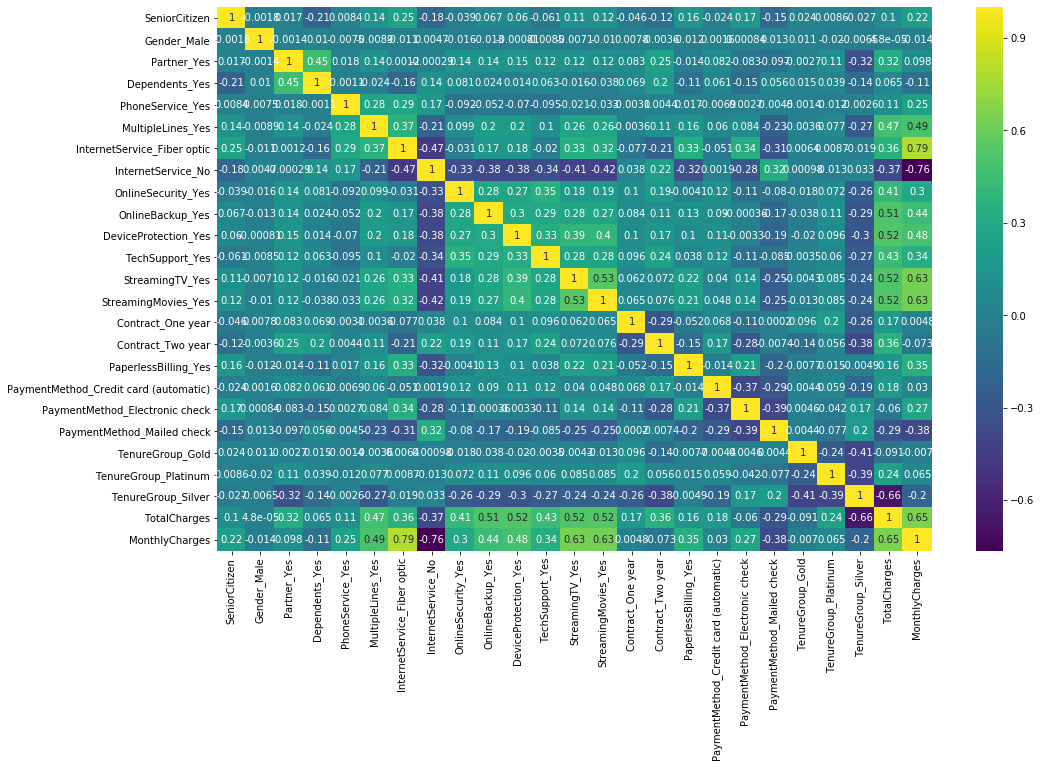

In [37]:
plt.figure(figsize=(16,10))

ax = sns.heatmap(X.corr(), cmap='viridis', annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Model Building

In [39]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [40]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4922, 25) (2110, 25) (4922,) (2110,)


#### Logistic Regression

In [41]:
log_model = LogisticRegression() #Logistic Regression
log_model.fit(X_train, y_train) #Train with Logistic Regression
y_log_pred = log_model.predict(X_test) #Predictions

print('#'*60)
print(classification_report(y_test, y_log_pred))
print('#'*60)

print("Accuracy Score: ",accuracy_score(y_test, y_log_pred))
print('#'*60)

############################################################
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

############################################################
Accuracy Score:  0.7976303317535545
############################################################


#### KNNClassifier

In [42]:
param_grid = dict(n_neighbors=range(1,20), leaf_size=[10,20,30,50,70,100])

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

print('#'*60)
print(classification_report(y_test, y_knn_pred))
print('#'*60)
print("Accuracy Score: ",accuracy_score(y_test, y_knn_pred))
print('#'*60)


############################################################
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.62      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

############################################################
Accuracy Score:  0.7890995260663507
############################################################


#### Decision Tree Classification

In [43]:
# Finding Best Parameters
param_grid_knn = dict(max_depth=range(1,30))
tree_model = GridSearchCV(DecisionTreeClassifier(), cv=5, param_grid=param_grid_knn)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)
print(tree_model.best_params_)

{'max_depth': 3}


In [44]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data=tree_model.feature_importances_.ravel(), index=X.columns, columns=['Importance'])

print('#'*60)
print(classification_report(y_test, y_tree_pred))
print('#'*60)
print("Accuracy Score: ",accuracy_score(y_test, y_tree_pred))
print('#'*60)

############################################################
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1549
           1       0.64      0.41      0.50       561

    accuracy                           0.78      2110
   macro avg       0.73      0.66      0.68      2110
weighted avg       0.77      0.78      0.77      2110

############################################################
Accuracy Score:  0.7824644549763033
############################################################


#### Random Forest Classification Model

In [55]:
# Finding Best Parameters
param_grid_rf = dict(n_estimators = [100,200,300,400,500], min_samples_split = [2,5,10])
rf_model = RandomizedSearchCV(RandomForestClassifier(), cv=5, param_distributions=param_grid_rf)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
print(rf_model.best_params_)

{'n_estimators': 500, 'min_samples_split': 10}


In [56]:
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=10)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

rf_df = pd.DataFrame(data=rf_model.feature_importances_.ravel(), index=X.columns, columns=['Importance'])

print('#'*60)
print(classification_report(y_test, y_rf_pred))
print('#'*60)
print("Accuracy Score: ",accuracy_score(y_test, y_rf_pred))
print('#'*60)

############################################################
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110

############################################################
Accuracy Score:  0.7962085308056872
############################################################


#### Guassian Naive Bayes Model

In [47]:
from sklearn.naive_bayes import GaussianNB

gu_model = GaussianNB()
gu_model.fit(X_train, y_train)
y_gu_pred = gu_model.predict(X_test)

print('#'*60)
print(classification_report(y_test, y_gu_pred))
print('#'*60)
print("Accuracy Score: ",accuracy_score(y_test, y_gu_pred))
print('#'*60)

############################################################
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.53      0.76      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110

############################################################
Accuracy Score:  0.7563981042654029
############################################################


#### XGBoost Classifier

In [48]:
# Finding Best Parameters
param_grid_xg = dict(n_estimators = [100,200,300,400,500], max_depth = [2,3,4,5,6,7,8,9,10])
xg_model = RandomizedSearchCV(XGBClassifier(), cv=5, param_distributions=param_grid_xg)
xg_model.fit(X_train, y_train)
y_xg_pred = xg_model.predict(X_test)
print(xg_model.best_params_)

{'n_estimators': 200, 'max_depth': 2}


In [49]:
xg_model = XGBClassifier(n_estimators=200, max_depth=2)
xg_model.fit(X_train, y_train)
y_xg_pred = xg_model.predict(X_test)

xg_df = pd.DataFrame(data=xg_model.feature_importances_.ravel(), index=X.columns, columns=['Importance'])

print('#'*60)
print(classification_report(y_test, y_rf_pred))
print('#'*60)
print("Accuracy Score: ",accuracy_score(y_test, y_xg_pred))
print('#'*60)

############################################################
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110

############################################################
Accuracy Score:  0.8023696682464455
############################################################


#### Accuracy Score Plot

In [57]:
accuracy_scores = [accuracy_score(y_test, y_log_pred), accuracy_score(y_test, y_knn_pred), accuracy_score(y_test, y_tree_pred),
         accuracy_score(y_test, y_rf_pred), accuracy_score(y_test, y_gu_pred), accuracy_score(y_test, y_xg_pred)]

recall_scores = [recall_score(y_test, y_log_pred), recall_score(y_test, y_knn_pred), recall_score(y_test, y_tree_pred),
         recall_score(y_test, y_rf_pred), recall_score(y_test, y_gu_pred), recall_score(y_test, y_xg_pred)]

f1_scores = [f1_score(y_test, y_log_pred), f1_score(y_test, y_knn_pred), f1_score(y_test, y_tree_pred),
         f1_score(y_test, y_rf_pred), f1_score(y_test, y_gu_pred), f1_score(y_test, y_xg_pred)]

precision_scores = [precision_score(y_test, y_log_pred), precision_score(y_test, y_knn_pred), precision_score(y_test, y_tree_pred),
         precision_score(y_test, y_rf_pred), precision_score(y_test, y_gu_pred), precision_score(y_test, y_xg_pred)]

area_curve = [roc_auc_score(y_test, y_log_pred), roc_auc_score(y_test, y_knn_pred), roc_auc_score(y_test, y_tree_pred),
         roc_auc_score(y_test, y_rf_pred), roc_auc_score(y_test, y_gu_pred), roc_auc_score(y_test, y_xg_pred)]

In [58]:
model_name = ['Logistic_Regression','KNNClassifier','Decision_Tree','Random_Forest','Naive_Bayes','XGBoost_Classifier']

In [59]:
score_df = pd.DataFrame({'Accuracy Score':accuracy_scores, 'Recall_Score':recall_scores, 'F1_Score':f1_scores,
                        'Precision_Score':precision_scores, 'Area_Under_Curve':area_curve}, index=model_name)

In [60]:
#Score dataframe
score_df

,Accuracy Score,Recall_Score,F1_Score,Precision_Score,Area_Under_Curve
Logistic_Regression,0.80,0.51,0.57,0.65,0.71
KNNClassifier,0.79,0.52,0.57,0.62,0.70
Decision_Tree,0.78,0.41,0.50,0.64,0.66
Random_Forest,0.80,0.49,0.56,0.66,0.70
Naive_Bayes,0.76,0.76,0.62,0.53,0.76
XGBoost_Classifier,0.80,0.52,0.58,0.66,0.71


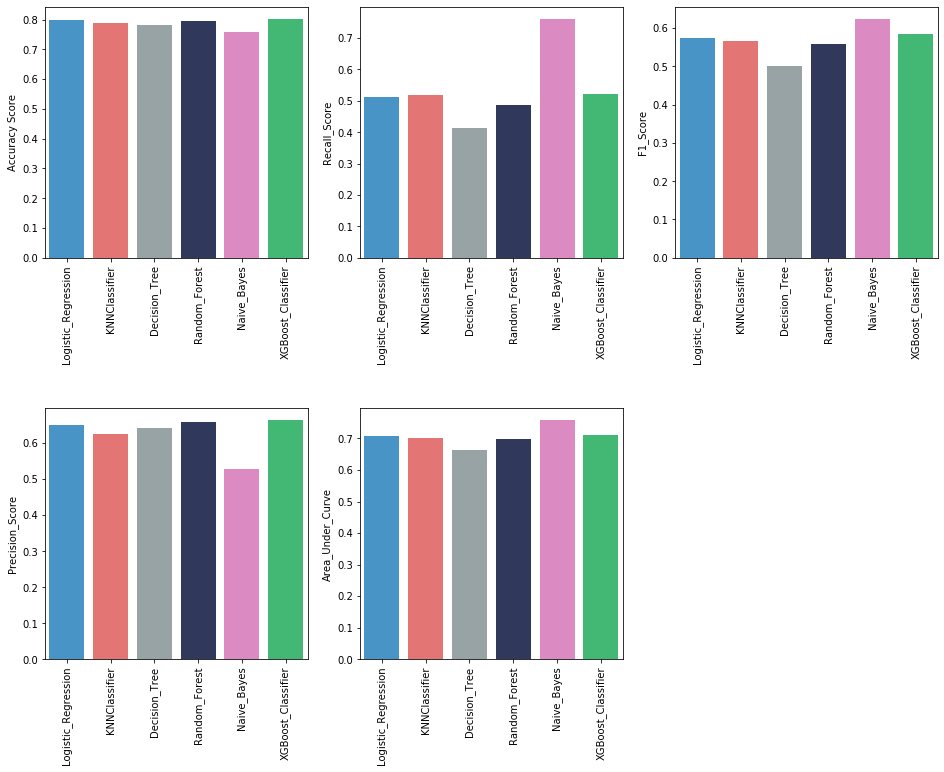

In [61]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.6)

for i in range(len(score_df.columns)):
    plt.subplot(2,3,i+1)
    plt.xticks(rotation=90)
    sns.barplot(score_df.index, score_df[score_df.columns[i]])

## Thank you 